<a href="https://colab.research.google.com/github/phmouras/Projeto_Pos/blob/main/pseudospectral%20kinks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy import exp

# Método pseudoespectral para ondas kinks


# ttpsi - colpsi + dV/dpsi = 0;  unidimensional



N = 300

L0 = 10

col = np.cos(np.arange(N)*math.pi / N)     # pontos de colocação
x = L0 * np.arctanh(col)                   # mapeamento   

xcol = 1/(L0*(np.cosh(x))**2)              # dx/dcol
xxcol = -2*np.tanh(x)/((np.cosh(x))**2)    # d^2 x / dcol^2


T = np.zeros([N+2,N])
xT = np.zeros([N+2,N])
xxT = np.zeros([N+2,N])
colT = np.zeros([N+2,N])
ccolT = np.zeros([N+2,N])

T[0,] = 1
T[1,] = col


for i in (range(2,N+2)):
  T[i,] = 2*col*T[i-1,] - T[i-2,]


xT[0,] = 0
xT[1,] = xcol

for i in range(2, N+2):
  colT[i,] = 2*col*colT[i-1,] + 2*T[i-1,] - colT[i-2,]
  xT[i,] = xcol*colT[i,]      # colT[i,] = dT[i,]/dcol, xcol = dcol/dx

xxT[0,] = 0
xxT[1,] = xxcol

for i in range(2, N+2):
  ccolT[i,] = 2*colT[i-1,] + 2*col*ccolT[i-1,] + 2*colT[i-1] - ccolT[i-2,]
  xxT[i,] = xxcol*colT[i,] + (xcol)**2 * ccolT[i,]   #ccolT[i,] = d²T[i,]/dcol²


psi = T[0:N,:]   
xpsi = xT[0:N,:]
xxpsi = xxT[0:N,:]

#xphi = np.dot(alpha, phi)

# Condicoes iniciais

x0 = 0
u = 0.1


f_k0 = np.tanh((x + x0)/np.sqrt(1 - u**2))        # dado inicial da solução viajante do kink 

f_antik0 = - np.tanh((x - x0)/np.sqrt(1 - u**2))  # dado inicial da solução viajante do antikink 

f_colisao0 = -1 + f_k0 - f_antik0                  # dado inicial da colisão de um kink com um antikink


psi0 = T[0:N,:]

inv_psi = np.linalg.inv(psi)

#a0 = np.dot(f_k0, inv_psi)   # coeficientes a(0)

a0 = np.dot(f_colisao0, np.linalg.inv(psi0))

phi = np.dot(a0, psi)

# Derivada temporal de psi para t = 0

dtf_k0 = (1-np.tanh((x-x0)/np.sqrt(-u**2+1))**2)*u/np.sqrt(-u**2+1)


da0 = np.dot(dtf_k0, inv_psi)  # da(0)

dtphi = np.dot(da0, psi)

a0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in arctanh


array([-1.00000000e+00,  2.53625516e+00, -1.51267887e-15, -8.18813745e-01,
       -2.24820162e-15,  4.61353060e-01, -1.66533454e-15, -3.00650679e-01,
       -1.36002321e-15,  2.07827861e-01, -3.46944695e-16, -1.47671392e-01,
       -1.33226763e-15,  1.06365767e-01, -1.31838984e-15, -7.71451886e-02,
       -4.16333634e-17,  5.61508401e-02, -5.96744876e-16, -4.09447125e-02,
       -8.88178420e-16,  2.98847414e-02, -6.80011603e-16, -2.18229311e-02,
       -8.81239526e-16,  1.59399210e-02, -1.03389519e-15, -1.16443658e-02,
       -7.77156117e-16,  8.50696715e-03, -9.92261828e-16, -6.21510949e-03,
       -1.28369537e-15,  4.54078167e-03, -6.86950496e-16, -3.31754248e-03,
       -1.55431223e-15,  2.42384279e-03, -5.20417043e-16, -1.77089773e-03,
       -1.33226763e-15,  1.29384744e-03, -9.29811783e-16, -9.45307166e-04,
       -1.13797860e-15,  6.90657888e-04, -1.26981758e-15, -5.04606778e-04,
       -7.35522754e-16,  3.68674604e-04, -1.36696210e-15, -2.69360175e-04,
       -6.59194921e-16,  

In [17]:
# Comparar solução exata com a aproximada. Verificar a compatibilidade entre as soluções
M = 300

xplot = np.linspace(-30,30,M)

colplot = np.tanh(xplot/L0)

Tplot = np.zeros([N+2,M])

Tplot[0,] = 1
Tplot[1,] = colplot


for i in (range(2,N+2)):
  Tplot[i,] = 2*colplot*Tplot[i-1,] - Tplot[i-2,]


psiplot = Tplot[0:N,:] 

xplot0 = 0
u = 0.1

f_kplot = np.tanh((xplot + xplot0)/np.sqrt(1 - u**2))

f_antikplot =  - np.tanh((xplot - xplot0)/np.sqrt(1 - u**2))

f_coliplot0 = -1 + f_kplot - f_antikplot

phiplot = np.dot(a0, psiplot)

erro = abs(phiplot - f)


dtfplot = (1-np.tanh((xplot-x0)/np.sqrt(-u**2+1))**2)*u/np.sqrt(-u**2+1)

dtphiplot = np.dot(da0, psiplot)

derro = abs(dtphiplot - dtfplot)

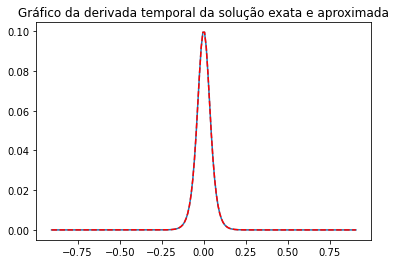

In [18]:
plt.plot(colplot, dtfplot)
plt.plot(colplot, dtphiplot, "--r")
plt.title("Gráfico da derivada temporal da solução exata e aproximada")
plt.show()

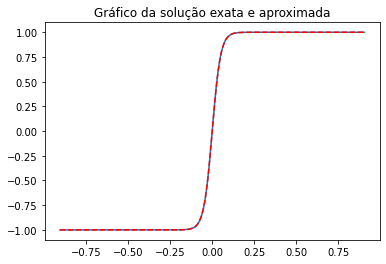

In [19]:
plt.plot(colplot, f)
plt.plot(colplot, phiplot, "--r")
plt.title("Gráfico da solução exata e aproximada")
plt.show()

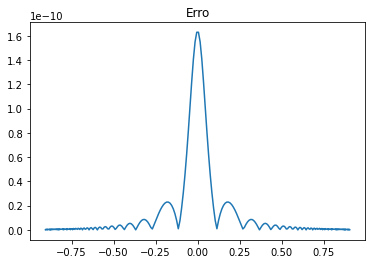

In [20]:
plt.plot(colplot, erro)
plt.title("Erro")
plt.show()

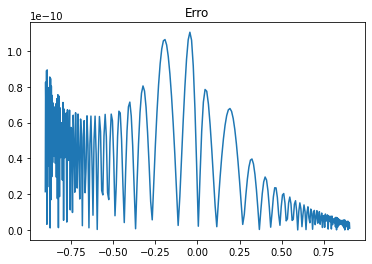

In [21]:
plt.plot(colplot, derro)
plt.title("Erro")
plt.show()

In [24]:

h = 0.01
tf = 100

It = int(tf/h)

t = np.linspace(0, tf, It + 1)

#f_k = np.tanh((x + x0 - u*t)/np.sqrt(1 - u**2))    # solução viajante do kink f_k(t)

#f_antik = - np.tanh((x - x0 + u*t)/np.sqrt(1 - u**2))  # solução viajante do antikink f_antik(t)

#f_colisao = -1 + f_k - f_antik                   # solução da colisão do kink e antikink




for i in range(It):  # Runge Kutta 4th order
  L1 = h*(a0)
  K1 = h*(a[i])

  L2 = h*(da[i] + K1/2)
  K2 = h*dda*(a[i] + L1/2)

  L3 = h*(da[i] + K2/2)
  K3 = h*dda*(a[i] + K2/2)

  L4 = h*(da[i] + K3)
  K4 = h*dda(a[i] + L3)   
  
  da[i+1] = 1/6 * (K1 + 2*K2 + 2*K3 + K4)
  a[i+1] = 1/6*(L1 + 2*L2 + 2*L3 + L4)
  



[ 1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.         

NameError: ignored